PS 04

Scan all numeric variables for outliers. If there are outliers, use the following techniques to deal with them. 

a) min max normalization 

b) z-score normalization 

c) Box plot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
num_cols = ['math score', 'reading score', 'writing score']

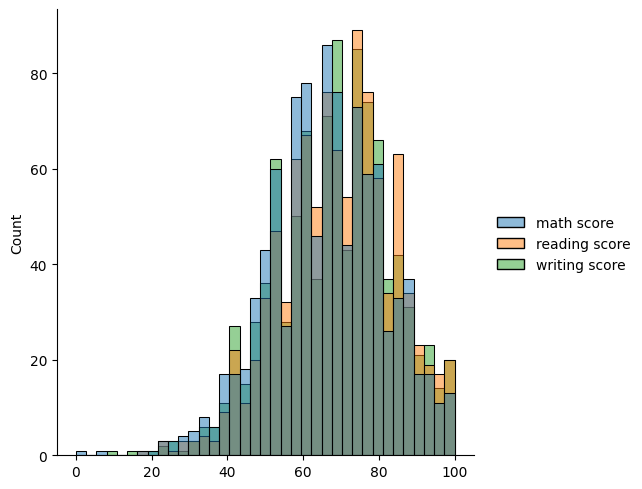

In [49]:
sns.displot(data = df)

In [37]:
# outlier removal using standardization (z-score)

df_std = df.copy(deep = True)

all_outliers = []

for col in num_cols:
  mean = df_std[col].mean()
  std = df_std[col].std()

  df_std[col] = (df_std[col] - mean) / std
  outliers = np.where(abs(df_std[col]) > 3)[0]

  for num in outliers:
    if num not in all_outliers:
      all_outliers.append(num)


df_std.drop(all_outliers, inplace = True)

print(all_outliers)
print("df_std shape: ", df_std.shape)

[17, 59, 787, 980, 327, 596, 76]
df_std shape:  (993, 8)


<Axes: ylabel='Count'>

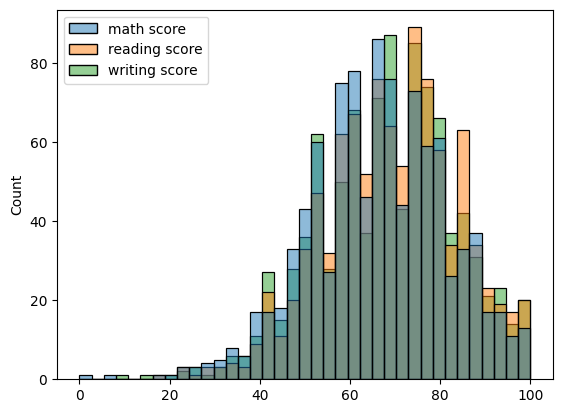

In [47]:
sns.histplot(data = df)

In [36]:
# outlier removal using normalization (min-max scaling)

df_norm = df.copy(deep = True)

all_outliers = []

for col in num_cols:
  min = df_norm[col].min()
  max = df_norm[col].max()

  df_norm[col] = (df_norm[col] - min) / (max - min)

  lower_limit = 0.01
  upper_limit = 0.99

  outliers = np.where((lower_limit > df_norm[col]) | (df_norm[col] > upper_limit))[0]

  for num in outliers:
    if num not in all_outliers:
      all_outliers.append(num)


print(all_outliers)
df_norm.drop(all_outliers, axis = 'rows', inplace = True)

print("df_norm shape: ", df_norm.shape)

[59, 149, 451, 458, 623, 625, 916, 962, 106, 114, 165, 179, 381, 546, 566, 594, 712, 886, 903, 957, 970, 377, 403, 685]
df_norm shape:  (976, 8)


<Axes: >

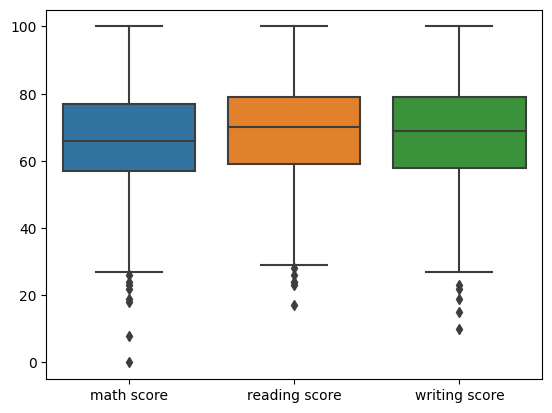

In [42]:
sns.boxplot(data = df)

In [41]:
# Using box plot

df_box = df.copy(deep = True)

all_outliers = []

for col in num_cols:
  q1 = df_box[col].quantile(0.25)
  q3 = df_box[col].quantile(0.75)

  iqr = q3 - q1

  lower_limit = q1 - 1.5 * iqr
  upper_limit = q3 + 1.5*iqr

  outliers = np.where((lower_limit > df_box[col]) | (df_box[col] > upper_limit))[0]

  for num in outliers:
    if num not in all_outliers:
      all_outliers.append(num)


print(all_outliers)
df_box.drop(all_outliers, axis = 'rows', inplace = True)

print("df_norm shape: ", df_box.shape)

[17, 59, 145, 338, 466, 787, 842, 980, 76, 211, 327, 596]
df_norm shape:  (988, 8)
